In [1]:
import torch
import torch.nn as nn

class PrescriptiveModel(nn.Module):
  def __init__(self, input_size):
    super(PrescriptiveModel, self).__init__()
    self.linear1 = nn.Linear(input_size, 20)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(20, 50)
    self.relu = nn.ReLU()
    self.linear3 = nn.Linear(50, 90)
    self.relu = nn.ReLU()
    self.linear4 = nn.Linear(90, 30)
    self.relu = nn.ReLU()
    self.linear5 = nn.Linear(30, 10)
    self.relu = nn.ReLU()
    self.linear6 = nn.Linear(10, 1)
    self.relu = nn.ReLU()
    

  def forward(self, x):
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.relu(self.linear3(x))
    x = self.relu(self.linear4(x))
    x = self.relu(self.linear5(x))
    x = self.relu(self.linear6(x))
    return x
  


prescriptive_model = PrescriptiveModel(4)

# Load the trained weights into the model architecture
prescriptive_model = torch.load("prescriptive_model.pth")

In [2]:

class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.model(x)

# Create an instance of the model
predictive_model = ANNModel()

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(predictive_model.parameters(), lr=0.01)


# Set the model to evaluation mode
predictive_model.eval()

Sequential(
  (0): Linear(in_features=3, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [3]:
def predict_insulin_dosage(prescriptive_model, input_data):
  """
  Predicts insulin dosage based on glucose level and meal size.
  """
  inputs = torch.tensor([input_data]).float()
  print(inputs)
  predicted_dose = prescriptive_model(inputs)
  predicted_dose = predicted_dose/1000
  return predicted_dose.item()  # Extract the actual value from the tensor

def predict_glucose_level(descriptive_model, glucose_level, insulin_dose, meal_size):
  """
  Predicts glucose level based on insulin dosage and meal size.
  """
  inputs = torch.tensor([glucose_level, meal_size, insulin_dose]).float()
  predicted_glucose = descriptive_model(inputs)
  return predicted_glucose.item()  # Extract the actual value from the tensor


In [4]:
import random
import warnings
import numpy as np
from sklearn.decomposition import PCA
from joblib import load

warnings.filterwarnings("ignore")

initial_value = (150, 0)
glucose_level = initial_value[0]
meal_size = initial_value[1]

pca = load('pca_model.joblib')

# Number of iterations
num_iterations = 1000

glucose_levels = []
insulin_dosages = []

for i in range(num_iterations):
    # Administer a meal every 100 iterations
    if i % 100 == 0:
        meal_size = random.randint(50,100)
    else:
        meal_size = 0

    # Transform the glucose level and meal size using the trained PCA model
    new_data = np.array([[glucose_level, meal_size]])
    new_data_transformed = pca.transform(new_data)
    new_data_pca = np.append(new_data, new_data_transformed)

    # Use prescriptive model to predict insulin dosage
    if glucose_level > 85:
        predicted_dose = predict_insulin_dosage(prescriptive_model, new_data_pca)
    else:
        predicted_dose = 0

    # Store glucose level and insulin dosage
    glucose_levels.append(glucose_level)
    insulin_dosages.append(predicted_dose)
    # Use descriptive model to predict resulting glucose level
    # (assuming the predicted dose is used)
    glucose_level = predict_glucose_level(predictive_model, glucose_level, predicted_dose, meal_size)

tensor([[150.0000,  72.0000,  -5.6324,  71.3296]])
tensor([[147.7350,   0.0000,  -7.4598,  -0.6828]])
tensor([[147.1914,   0.0000,  -8.0033,  -0.6862]])
tensor([[146.6535,   0.0000,  -8.5413,  -0.6894]])
tensor([[146.1210,   0.0000,  -9.0737,  -0.6927]])
tensor([[145.5940,   0.0000,  -9.6007,  -0.6959]])
tensor([[145.0724,   0.0000, -10.1223,  -0.6990]])
tensor([[144.5562,   0.0000, -10.6385,  -0.7022]])
tensor([[144.0453,   0.0000, -11.1494,  -0.7053]])
tensor([[143.5396,   0.0000, -11.6551,  -0.7083]])
tensor([[143.0391,   0.0000, -12.1556,  -0.7114]])
tensor([[142.5437,   0.0000, -12.6510,  -0.7144]])
tensor([[142.0534,   0.0000, -13.1413,  -0.7174]])
tensor([[141.5681,   0.0000, -13.6266,  -0.7203]])
tensor([[141.0878,   0.0000, -14.1068,  -0.7232]])
tensor([[140.6125,   0.0000, -14.5822,  -0.7261]])
tensor([[140.1420,   0.0000, -15.0527,  -0.7290]])
tensor([[139.6763,   0.0000, -15.5183,  -0.7318]])
tensor([[139.2154,   0.0000, -15.9792,  -0.7346]])
tensor([[138.7592,   0.0000, -1

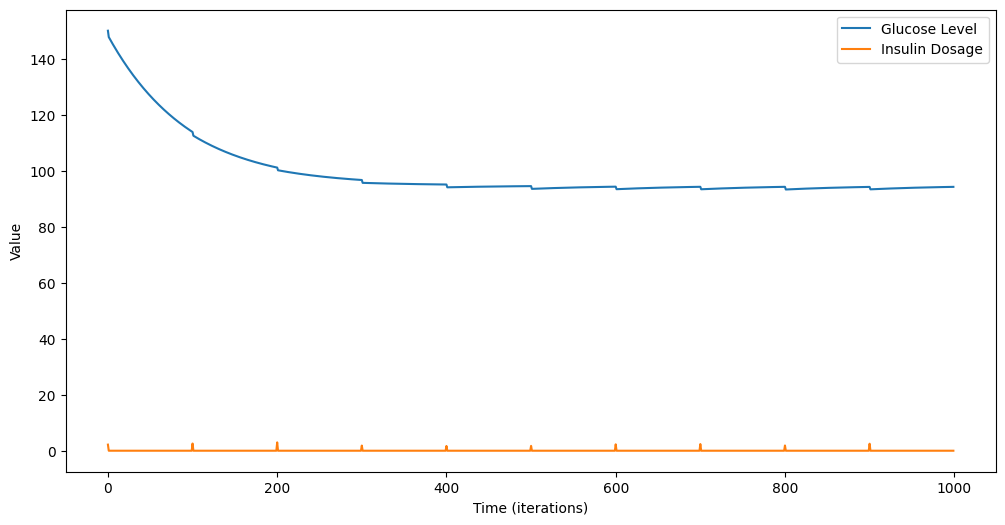

In [5]:
import matplotlib.pyplot as plt

# Plot glucose levels and insulin dosages over time
plt.figure(figsize=(12, 6))
plt.plot(glucose_levels, label='Glucose Level')
plt.plot(insulin_dosages, label='Insulin Dosage')
plt.xlabel('Time (iterations)')
plt.ylabel('Value')
plt.legend()
plt.show()